# Task A

In [1]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df                 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
#taking number of clusters 5 as we have checked it through elbow method in previous task on same data set
clustering = AgglomerativeClustering(n_clusters = 5)
clustering.fit(x)

AgglomerativeClustering(n_clusters=5)

In [5]:
print(clustering.labels_)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


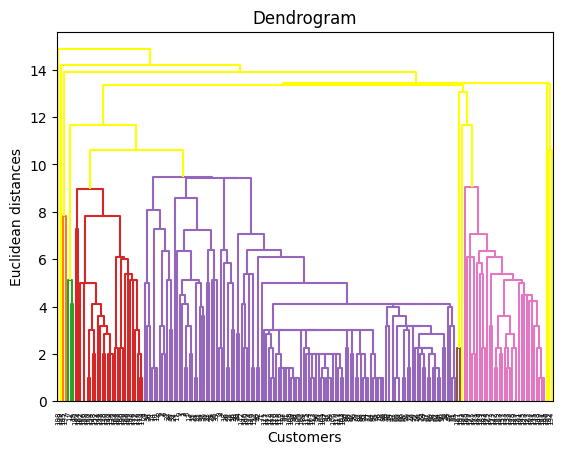

In [6]:
dendrogram = hierarchy.linkage(x, 'single')
d = hierarchy.dendrogram(dendrogram, above_threshold_color='Yellow')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Task B

In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('Mall_Customers.csv')
df 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [10]:
#Making clusters and k = 5 by elbow method used un previous lab task on same data set
k = 5
clusters = [[x] for x in x]

In [11]:
#Making clusters and k = 5 by elbow method used un previous lab task on same data set
#k = 5
#centroids = x.sample(k).values
#while True:
 #   EuclidianDistance = np.sqrt(((x.values - centroids[:, np.newaxis])**2).sum(axis=2))
  #  labels = np.argmin(EuclidianDistance, axis=0)
   # updated_centroids = np.array([x.values[labels == i].mean(axis=0) for i in range(k)])
    #if np.allclose(centroids, updated_centroids):
     #   break
    #centroids = updated_centroids

#centroids

In [12]:
def EuclidianDistance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [13]:
def Datapointsdistance(clusters):
    n = len(clusters)
    pointsdistance = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            pointsdistance[i, j] = EuclidianDistance(np.mean(clusters[i], axis=0), np.mean(clusters[j], axis=0))
            pointsdistance[j, i] = pointsdistance[i, j]
    return pointsdistance

In [14]:
def closestdatapoints(pointsdistance):
    min_dist = np.inf
    n = len(pointsdistance)
    for i in range(n):
        for j in range(i+1, n):
            if pointsdistance[i, j] < min_dist:
                min_dist = pointsdistance[i, j]
                closest_i, closest_j = i, j
    return closest_i, closest_j

In [15]:
def MergeClusters(clusters, closest_i, closest_j):
    NewCluster = clusters[closest_i] + clusters[closest_j]
    del clusters[closest_j]
    del clusters[closest_i]
    clusters.append(NewCluster)

In [16]:
while len(clusters) > k:
    dist_matrix = Datapointsdistance(clusters)
    closest_i, closest_j = closest_pair(pointsdistance)
    MergeClusters(clusters, closest_i, closest_j)
    closest_i,closest_j

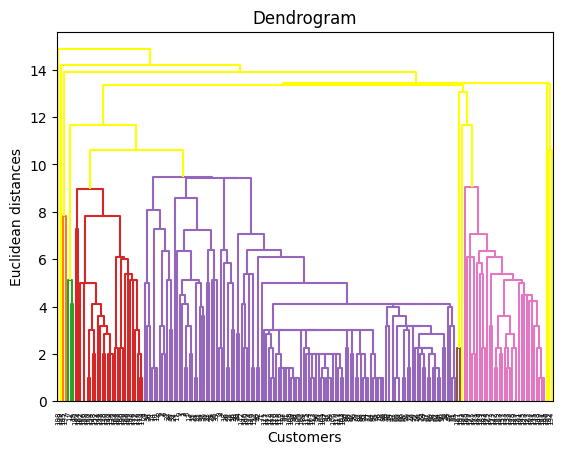

In [17]:
dendrogram = hierarchy.linkage(x, 'single')
d = hierarchy.dendrogram(dendrogram, above_threshold_color='Yellow')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()